In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import seaborn as sns
import pandas as pd
import dlsfunctions as dls
import scipy
import scipy.optimize
import scipy.integrate

In [2]:
dls_data = np.loadtxt('2015_07_22_Eonly0005_MILLISECONDS.asc', encoding='latin1', skiprows=28, max_rows=214)

In [3]:
tau = dls_data[:,0]
intensity = dls_data[:,1]

In [4]:
popt, pcov = scipy.optimize.curve_fit(dls.single_exponential_fit, tau, intensity)

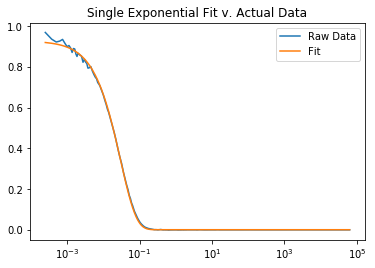

In [5]:
plt.semilogx(tau, intensity, label='Raw Data')
plt.semilogx(tau, dls.single_exponential_fit(tau, popt[0], popt[1], popt[2]), label='Fit')
plt.title("Single Exponential Fit v. Actual Data")
plt.legend()

In [6]:
# determining the most probably radius
m = 40
c = 1
eta = 1e-3
n = 1.33
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9


gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

In [7]:
r = dls.determine_radius(popt[0], n, lambda_0, theta, eta, k_b, t)
r

2.2439608235145855e-09

In [8]:
diameter = r*2
diameter

4.487921647029171e-09

In [9]:
d = np.linspace(1e-9, 9e-9, 40)
sigma = 5e-10


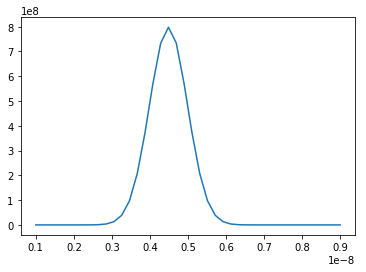

In [10]:
distribution = dls.generate_distribution(d, diameter, sigma, c)
plt.plot(d, distribution)

In [11]:
dls.check_distribution_norm(distribution, d[1] - d[0])

1.0

In [61]:
ndim = 41
nwalkers = 100
nsteps = 5000

In [62]:
beta = 0.9
theta_in = np.append(distribution, beta)

In [63]:
start_pos = [theta_in + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [64]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior, args=(d, intensity, m, gamma, tau*0.001))

In [65]:
result = sampler.run_mcmc(start_pos, nsteps)

emcee: Exception while calling your likelihood function:
  params: [ 1.61856877e+03  8.46424198e+02  5.38943244e+02  7.80048334e+02
  5.87435299e+01  4.31301985e+03  3.11266619e+04  1.76650643e+05
  8.68643695e+05  3.63659854e+06  1.28585572e+07  3.84243108e+07
  9.70334167e+07  2.07069266e+08  3.73434337e+08  5.69137993e+08
  7.33039773e+08  7.97884161e+08  7.33933340e+08  5.70526981e+08
  3.74803640e+08  2.08080275e+08  9.76226809e+07  3.87072159e+07
  1.29705056e+07  3.67209796e+06  8.80846049e+05  1.76606803e+05
  3.16118403e+04  3.95466007e+03  2.01420651e+02  4.37081467e+02
  3.41879721e+02 -2.66862347e-01  3.43613482e+02  6.27414457e+01
  7.88497952e-01  2.74829251e+03  2.57348148e+03  8.59494416e+00
  6.97319734e-01]
  args: (array([1.00000000e-09, 1.20512821e-09, 1.41025641e-09, 1.61538462e-09,
       1.82051282e-09, 2.02564103e-09, 2.23076923e-09, 2.43589744e-09,
       2.64102564e-09, 2.84615385e-09, 3.05128205e-09, 3.25641026e-09,
       3.46153846e-09, 3.66666667e-09, 3.87

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "dlsfunctions.py", line 119, in log_posterior
    return log_prior(theta, m) + log_likelihood(theta, d, y, m, gamma, time)
  File "dlsfunctions.py", line 106, in log_likelihood
    g2_result = g2(theta, d, m, gamma, time)
  File "dlsfunctions.py", line 70, in g2
    sum_squared = (np.sum(f*expo*delta_d))**2
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
sampler.acceptance_fraction

In [ ]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax0, ax1) = plt.subplots(2)
ax0.set(ylabel='f(d0)')
ax1.set(ylabel='f(d1)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 0], ax=ax0)
    sns.tsplot(sampler.chain[j, :, 1], ax=ax1)

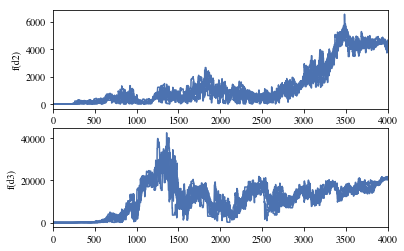

In [60]:
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

fig, (ax2, ax3) = plt.subplots(2)
ax2.set(ylabel='f(d2)')
ax3.set(ylabel='f(d3)')

for j in range(10):
    sns.tsplot(sampler.chain[j, :, 2], ax=ax2)
    sns.tsplot(sampler.chain[j, :, 3], ax=ax3)